In [150]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/SWeatherTour.csv')
data.head()

,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),최고해면기압 나타난날(yyyymmdd),최저해면기압 나타난날(yyyymmdd),평균수증기압(hPa),최고수증기압(hPa),최저수증기압(hPa),최고수증기압 나타난날(yyyymmdd),최저수증기압 나타난날(yyyymmdd),평균이슬점온도(°C),평균상대습도(%),최소상대습도(%),최소상대습도 나타난날(yyyymmdd),월합강수량(00~24h만)(mm),일최다강수량(mm),1시간최다강수량(mm),10분최다강수량(mm),일최다강수량 나타난날(yyyymmdd),1시간최다강수량 나타난날(yyyymmdd),10분최다강수량 나타난날(yyyymmdd),소형총증발량(mm),소형일최대증발량(mm),대형총증발량(mm),대형일최대증발량(mm),소형일최대증발량 나타난날(yyyymmdd),대형일최대증발량 나타난날(yyyymmdd),평균풍속(m/s),최대풍속(m/s),최대순간풍속(m/s),최대풍속 풍향(16방위),...,최대풍속 나타난날(yyyymmdd),최대순간풍속 나타난날(yyyymmdd),최다풍향(16방위),평균운량(1/10),평균중하층운량(1/10),합계 일조시간(hr),일조율(%),합계 일사량(MJ/m2),최심적설(cm),최심신적설(cm),3시간신적설합(cm),최심적설 나타난날(yyyymmdd),최심신적설 나타난날(yyyymmdd),평균 최저초상온도(°C),최저초상온도(°C),최저초상온도 나타난날(yyyymmdd),평균지면온도(°C),0.05m평균지중온도(°C),0.1m평균지중온도(°C),0.2m평균지중온도(°C),0.3m평균지중온도(°C),0.5m평균지중온도(°C),1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C),서울_종로구_경복궁,서울_종로구_종묘,서울_종로구_창경궁,서울_종로구_창덕궁,서울_중구_남산골한옥마을,서울_중구_덕수궁,서울_중구_서울시립미술관 본관,서울_용산구_국립중앙박물관,서울_노원구_태릉 · 강릉 · 조선왕릉전시관,서울_서대문구_서대문자연사박물관,서울_서대문구_서대문형무소역사관,서울_마포구_트릭아이미술관,서울_서초구_헌릉ㆍ인릉,서울_강남구_선릉·정릉
0,201101,-7.2,-3.4,-10.5,0.3,-17.8,20110114,20110116,1016.1,1027.3,1039.6,1014.9,20110127,20110111,2.0,4.5,0.7,20110123,20110116,-15.3,54,19,20110119,8.9,5.3,NaN,NaN,20110123,NaN,NaN,37.5,1.7,NaN,NaN,20110112,NaN,2.8,8.0,14.4,270,...,20110115,20110115,270,2.7,1.8,218.5,71.15,308.49,6.0,6.0,12.2,20110124.0,20110123.0,-16.1,-22.2,20110117,-4.7,-3.3,-2.7,-2.2,-1.1,1.5,5.3,8.3,14.6,17.2,141183,11486,17644,43677,72313,92135,234587,260272,1747,34551,18407,10128.0,736,13486.0
1,201102,1.2,5.9,-2.5,13.2,-9.2,20110226,20110212,1011.3,1022.1,1031.3,1007.6,20110215,20110208,3.7,8.1,1.3,20110227,20110225,-7.6,55,15,20110225,29.1,28.5,NaN,NaN,20110227,NaN,NaN,50.5,3.2,NaN,NaN,20110225,NaN,2.6,10.6,17.4,70,...,20110227,20110227,270,4.0,2.0,166.6,55.07,303.18,1.6,0.2,0.2,20110201.0,20110217.0,-9.6,-16.5,20110213,1.7,0.6,0.5,0.3,0.4,1.0,3.5,6.2,12.3,15.9,230814,17078,35708,73330,135771,132920,171376,224691,1943,20934,14387,15695.0,1730,18578.0
2,201103,3.6,8.3,-0.1,16.8,-5.5,20110331,20110303,1010.7,1021.4,1029.0,1011.4,20110326,20110320,4.1,9.5,0.9,20110313,20110316,-6.6,51,12,20110322,14.6,5.8,NaN,NaN,20110324,NaN,NaN,91.7,4.4,NaN,NaN,20110321,NaN,3.4,9.9,15.4,230,...,20110308,20110308,270,3.3,2.0,240.2,64.83,506.61,1.8,1.8,2.5,20110324.0,20110324.0,-5.0,-11.9,20110303,6.4,5.2,5.3,5.2,5.4,5.2,5.8,6.9,11.0,14.7,228276,22238,29856,78705,105735,64869,260687,184565,3000,18641,47554,11468.0,2085,22696.0
3,201104,10.7,15.6,6.8,19.0,4.3,20110415,20110401,1003.8,1014.1,1028.4,998.7,20110405,20110427,6.8,15.3,1.8,20110430,20110411,0.3,54,10,20110411,110.1,69.0,12.0,5.5,20110430,20110430.0,20110430.0,112.7,6.6,79.6,4.5,20110411,20110411.0,3.2,9.5,16.4,230,...,20110424,20110424,270,4.7,2.9,202.1,51.20,504.97,NaN,NaN,NaN,NaN,NaN,1.1,-4.7,20110401,13.6,12.2,12.1,11.7,11.7,10.7,10.0,9.6,10.8,13.5,349368,30470,70101,129150,176991,85548,56024,240861,8029,24078,66009,11577.0,5212,43184.0
4,201105,17.9,23.0,13.6,31.2,8.5,20110529,20110502,1000.8,1010.7,1017.1,999.8,20110524,20110501,11.1,22.4,4.8,20110509,20110514,7.9,57,15,20110508,53.4,15.0,3.5,1.5,20110520,20110520.0,20110520.0,134.6,8.0,95.1,5.4,20110529,20110514.0,2.8,9.7,16.4,200,...,20110519,20110513,250,5.6,2.8,180.4,41.02,529.85,NaN,NaN,NaN,NaN,NaN,8.9,3.2,20110504,21.0,19.4,19.1,18.5,18.2,16.3,14.6,13.4,11.9,13.2,438567,56106,78017,151833,188983,103100,279310,307969,17108,25593,72267,9507.0,6201,44836.0


In [218]:
data.columns

Index(['일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)', '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
       '평균상대습도(%)', '최소상대습도(%)', '최소상대습도 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)', '1시간최다강수량(mm)', '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)', '대형총증발량(mm)', '대형일최대증발량(mm)', '소형일최대증발량 나타난날(yyyymmdd)',
       '대형일최대증발량 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대풍속(m/s)', '최대순간풍속(m/s)',
       '최대풍속 풍향(16방위)', '최대순간풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)', '최다풍향(16방위)', '평균운량(1/10)', '평균중하층운량(1/10)',
       '합계 일조시간(hr)', '일조율(%)', '합계 일사량(MJ/m2)', '최심적설(cm)', '최심신적설(cm)',
       '3시간신적설합(cm)', '최

In [219]:
data = data[['일시','평균기온(°C)','최고기온(°C)','최소상대습도(%)','평균상대습도(%)','월합강수량(00~24h만)(mm)','평균풍속(m/s)','합계 일조시간(hr)','서울_용산구_국립중앙박물관','최저해면기압(hPa)','최대순간풍속 풍향(16방위)']]
data=data.rename(columns = {'평균기온(°C)':'평균기온', '최고기온(°C)':'최고기온','최소상대습도(%)':'최저상대습도','평균상대습도(%)':'평균상대습도', '월합강수량(00~24h만)(mm)':'총강수량','평균풍속(m/s)':'평균풍속','합계 일조시간(hr)':'일조시간','서울_용산구_국립중앙박물관':'target'})
data.head()

,일시,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,target,최저해면기압(hPa),최대순간풍속 풍향(16방위)
0,201101,-7.2,0.3,19,54,8.9,2.8,218.5,260272,1014.9,320
1,201102,1.2,13.2,15,55,29.1,2.6,166.6,224691,1007.6,50
2,201103,3.6,16.8,12,51,14.6,3.4,240.2,184565,1011.4,250
3,201104,10.7,19.0,10,54,110.1,3.2,202.1,240861,998.7,230
4,201105,17.9,31.2,15,57,53.4,2.8,180.4,307969,999.8,230


In [220]:
data

,일시,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,target,최저해면기압(hPa),최대순간풍속 풍향(16방위)
0,201101,-7.2,0.3,19,54,8.9,2.8,218.5,260272,1014.9,320
1,201102,1.2,13.2,15,55,29.1,2.6,166.6,224691,1007.6,50
2,201103,3.6,16.8,12,51,14.6,3.4,240.2,184565,1011.4,250
3,201104,10.7,19.0,10,54,110.1,3.2,202.1,240861,998.7,230
4,201105,17.9,31.2,15,57,53.4,2.8,180.4,307969,999.8,230
...,...,...,...,...,...,...,...,...,...,...,...
103,201908,27.2,36.8,28,69,190.5,1.6,239.3,478483,990.8,200
104,201909,22.6,30.5,24,65,139.8,2.2,168.9,244301,987.7,140
105,201910,16.4,28.2,23,62,55.5,2.1,236.5,289342,1002.0,340
106,201911,7.6,22.1,14,56,78.8,2.2,203.2,197011,1004.7,340


# EDA

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107],
 <a list of 108 Text major ticklabel objects>)

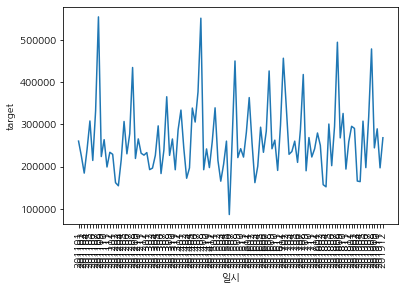

In [221]:
# lineplot으로 추세 확인해 보기
data['일시'] = data['일시'].astype('str')
sns.lineplot(data = data, x = '일시', y = 'target')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'distplot target')

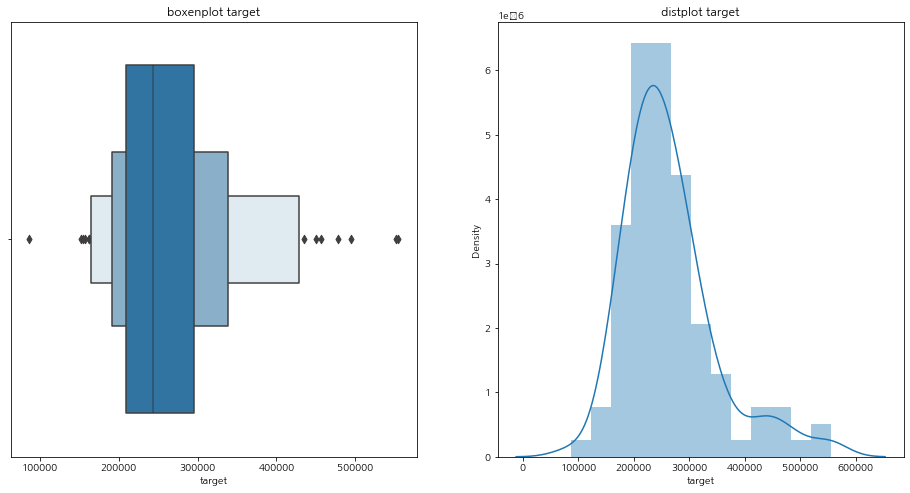

In [222]:
# 종속변수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.boxenplot(data['target'], ax = ax[0])
sns.distplot(data['target'], ax = ax[1])

ax[0].set_title('boxenplot target')
ax[1].set_title('distplot target')

Text(0.5, 1.0, 'distplot target')

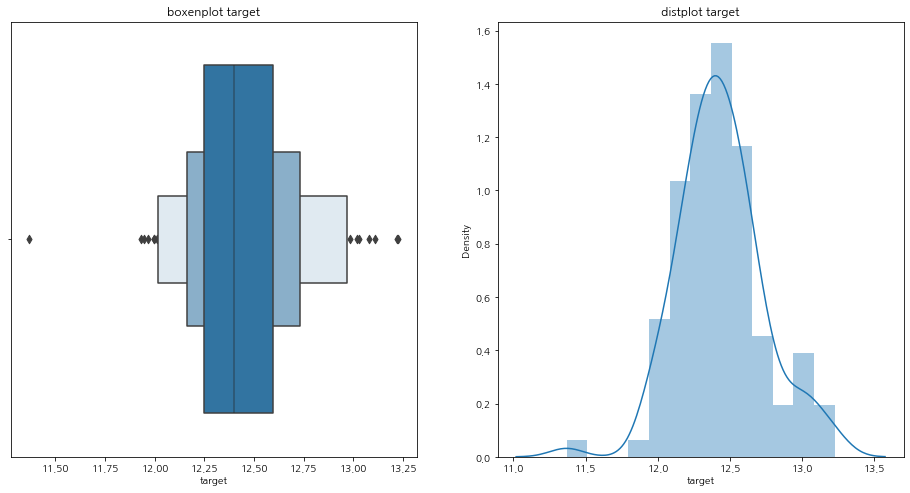

In [223]:
# 정규화 이후에 분포 찍어보기
data['target'] = data['target'].apply(lambda x: np.log1p(x))

fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.boxenplot(data['target'], ax = ax[0])
sns.distplot(data['target'], ax = ax[1])

ax[0].set_title('boxenplot target')
ax[1].set_title('distplot target')

Text(0.5, 1.0, '평균기온 boxenplot')

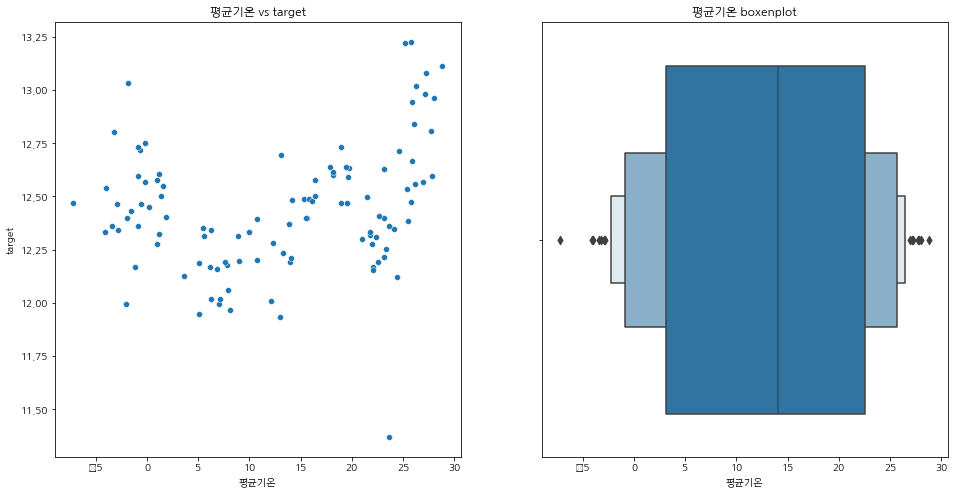

In [224]:
# 평균기온 확인해 보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = data, x = '평균기온', y = 'target', ax = ax[0])
sns.boxenplot(data['평균기온'], ax = ax[1])
ax[0].set_title('평균기온 vs target')
ax[1].set_title('평균기온 boxenplot')

Text(0.5, 1.0, '최고기온 boxenplot')

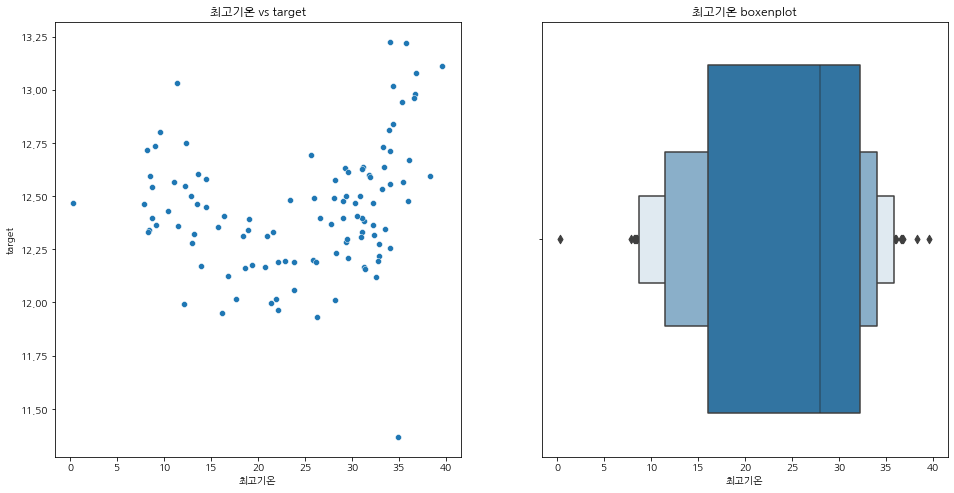

In [225]:
# 최고기온
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = data, x = '최고기온', y = 'target', ax= ax[0])
sns.boxenplot(data['최고기온'], ax = ax[1])
ax[0].set_title('최고기온 vs target')
ax[1].set_title('최고기온 boxenplot')

Text(0.5, 1.0, '최저상대습도 boxenplot')

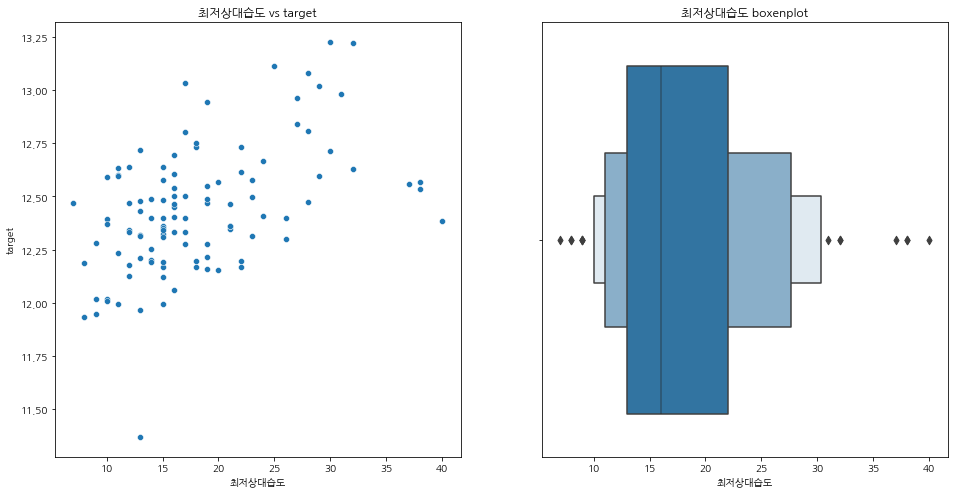

In [226]:
# 최저 상대습도
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = data, x = '최저상대습도', y = 'target', ax= ax[0])
sns.boxenplot(data['최저상대습도'], ax = ax[1])
ax[0].set_title('최저상대습도 vs target')
ax[1].set_title('최저상대습도 boxenplot')

Text(0.5, 1.0, '평균상대습도 boxenplot')

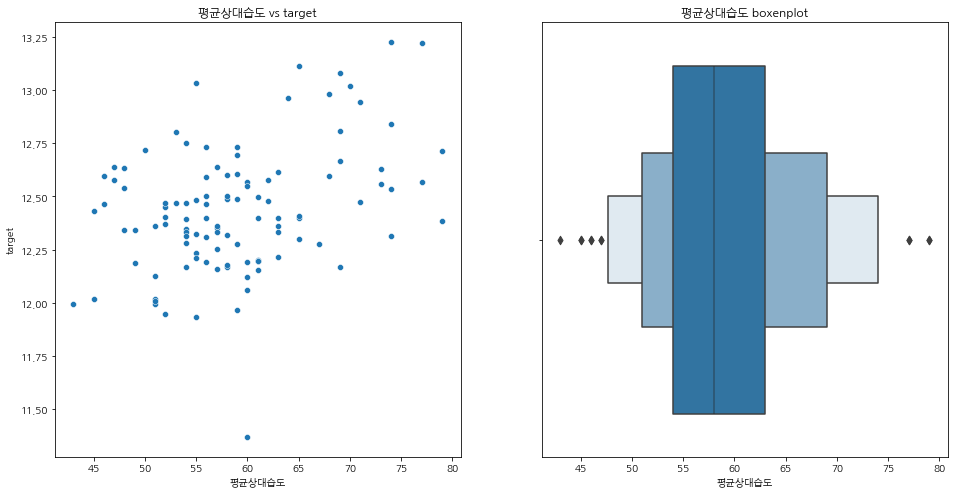

In [227]:
# 평균상대습도
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = data, x = '평균상대습도', y = 'target', ax= ax[0])
sns.boxenplot(data['평균상대습도'], ax = ax[1])
ax[0].set_title('평균상대습도 vs target')
ax[1].set_title('평균상대습도 boxenplot')

Text(0.5, 1.0, '총강수량 boxenplot')

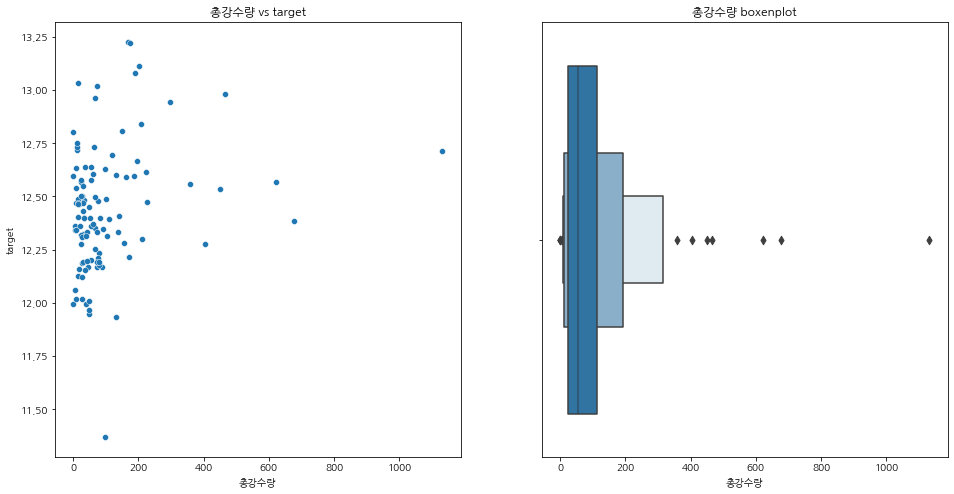

In [228]:
# 총강수량
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = data, x = '총강수량', y = 'target', ax= ax[0])
sns.boxenplot(data['총강수량'], ax = ax[1])
ax[0].set_title('총강수량 vs target')
ax[1].set_title('총강수량 boxenplot')

Text(0.5, 1.0, '평균풍속 boxenplot')

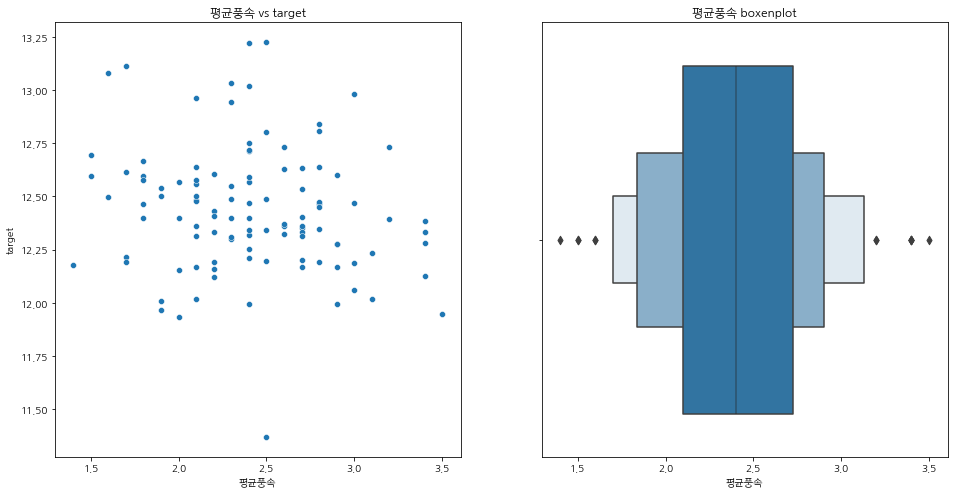

In [229]:
# 평균풍속
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = data, x = '평균풍속', y = 'target', ax= ax[0])
sns.boxenplot(data['평균풍속'], ax = ax[1])
ax[0].set_title('평균풍속 vs target')
ax[1].set_title('평균풍속 boxenplot')

Text(0.5, 1.0, '일조시간 boxenplot')

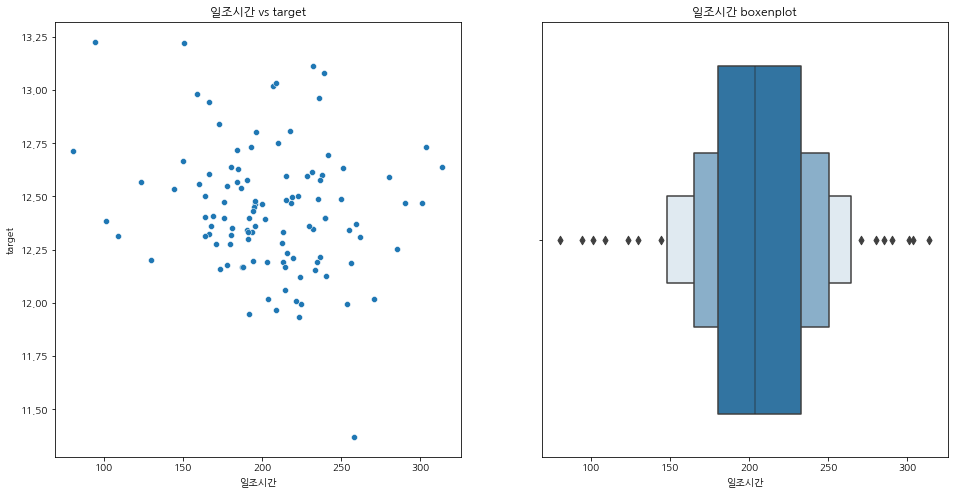

In [230]:
# 일조시간
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = data, x = '일조시간', y = 'target', ax= ax[0])
sns.boxenplot(data['일조시간'], ax = ax[1])
ax[0].set_title('일조시간 vs target')
ax[1].set_title('일조시간 boxenplot')

# 여름철 체감온도, 겨울철 체감온도, 불쾌지수

In [231]:
class final_dataframe:
  # 여름철 체감온도
  def summer_feature(df = None):
    H = df['평균상대습도']
    T = df['평균기온'].apply(lambda x:32 + (1.8 * x))
    temperature = -42.379 + (2.04901523*T) + (10.14333127 * H) - (0.22475541 * T * H) - (6.83783 * (10 ** -3) * (T ** 2)) - (5.481717 * (10 ** -2)*(H**2)) + (1.22874 * (10 ** -3) * (T ** 2) * H) + (8.5282 * (10 ** -4) * T * (H **2)) - (1.99 * (10**-6) * (T**2) * (H**2))    
    df['여름철 체감온도'] = temperature
    return df
  # 겨울철 체감온도
  def winter_feature(df = None):
    T = df['평균기온'].apply(lambda x:32 + (1.8*x))
    V = df['평균풍속']
    temperature = 13.12 + (0.6215 * T) - (11.37 * 0.16 ** V) + (0.3965 *V *0.16**T)
    df['겨울철 체감온도'] = temperature
    return df
  # 불쾌지수 구하기
  def 불쾌지수(df = None):
    T = df['평균기온']
    H = df['평균상대습도']
    불쾌지수 = (9/5 * T) - (0.55 * (1 - H/100) * ((9/5 * T) - 26)) + 32
    df['불쾌지수'] = 불쾌지수
    return df
  def final_dataframe(df = None):
    df1=final_dataframe.summer_feature(df = df)
    df2=final_dataframe.winter_feature(df = df1)
    df3=final_dataframe.불쾌지수(df = df2)
    return df3
data = final_dataframe.final_dataframe(data)

In [232]:
def year_month(data = None):
  data['year'] = data['일시'].apply(lambda x:x[:4])
  data['month'] = data['일시'].apply(lambda x:x[4:])

  return data

data = year_month(data)

In [233]:
# 계절을 만들어 주기
def weather_binning(data = None):
  for i in data.index:
    if data.loc[i,'month'] in ['02','12','01']:
      data.loc[i,'weather'] = '겨울'
    elif data.loc[i,'month'] in ['03','04','05']:
      data.loc[i,'weather'] = '봄'
    elif data.loc[i,'month'] in ['06','07','08']:
      data.loc[i,'weather'] = '여름'
    else:
      data.loc[i,'weather'] = '가을'
  return data

data = weather_binning(data)

In [234]:
data.head()

,일시,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,target,최저해면기압(hPa),최대순간풍속 풍향(16방위),여름철 체감온도,겨울철 체감온도,불쾌지수,year,month,weather
0,201101,-7.2,0.3,19,54,8.9,2.8,218.5,12.469486,1014.9,320,220.263363,24.886171,28.89688,2011,01,겨울
1,201102,1.2,13.2,15,55,29.1,2.6,166.6,12.322486,1007.6,50,149.388194,34.253507,40.06040,2011,02,겨울
2,201103,3.6,16.8,12,51,14.6,3.4,240.2,12.125762,1011.4,250,130.476121,37.012945,43.74064,2011,03,봄
3,201104,10.7,19.0,10,54,110.1,3.2,202.1,12.391979,998.7,230,97.020249,44.945809,52.96522,2011,04,봄
4,201105,17.9,31.2,15,57,53.4,2.8,180.4,12.637758,999.8,230,78.479349,52.965541,62.74897,2011,05,봄


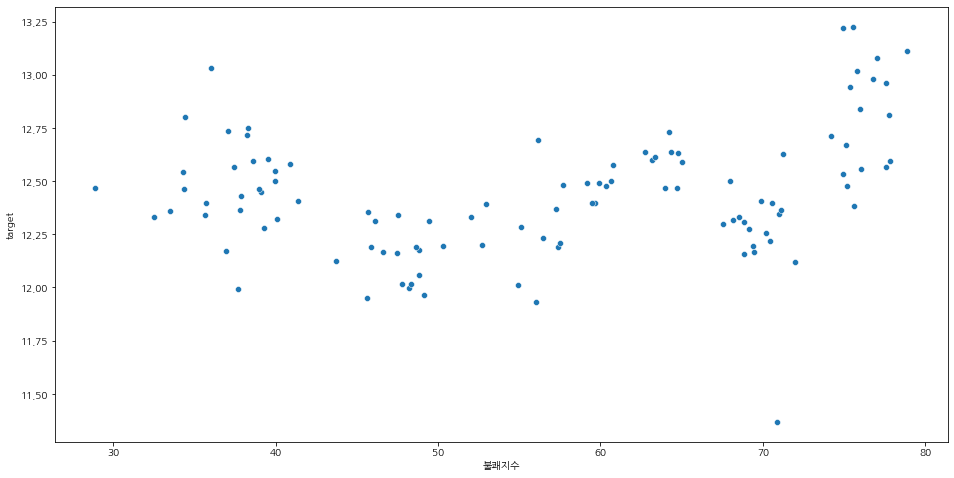

In [235]:
# 불쾌지수와 target 비교해보기
# 불쾌지수가 너무 적을 때 높았다가 낮아지고 다시 높아지는 결과가 있다.
plt.figure(figsize = (16,8))
sns.scatterplot(data = data, x = '불쾌지수', y = 'target')

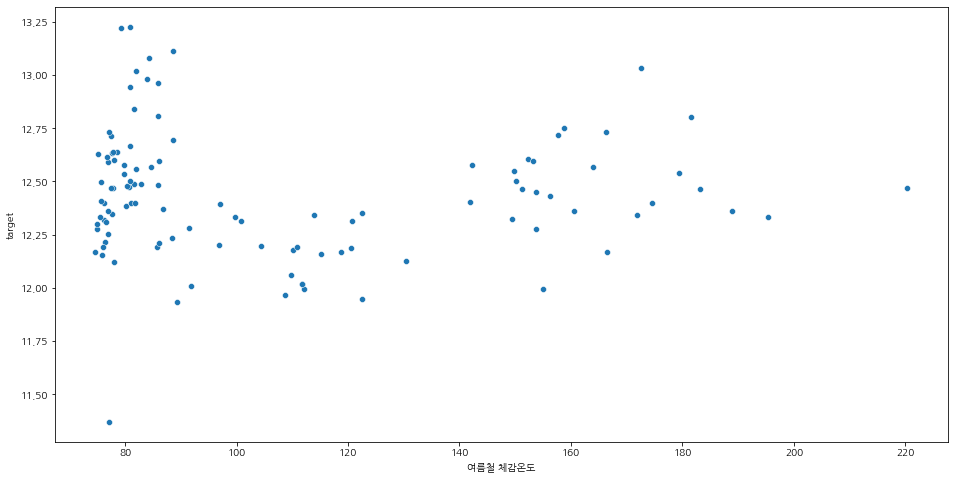

In [236]:
# 여름철 체감온도와 비교해보기
plt.figure(figsize = (16,8))
sns.scatterplot(data = data, x = '여름철 체감온도', y = 'target')

# 딱히 연관이 없다고 판단한다.

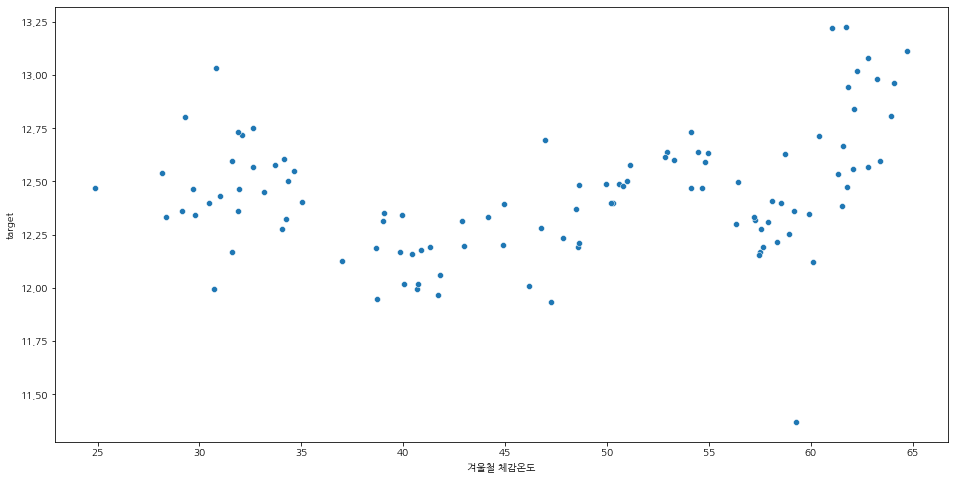

In [237]:
# 겨울철 체감온도와 비교해본다.
# 겨울철 체감온도도 불쾌지수와 비슷한 결과를 보인다.
plt.figure(figsize = (16,8))
sns.scatterplot(data = data, x = '겨울철 체감온도', y = 'target')

Text(0.5, 1.0, 'year vs target')

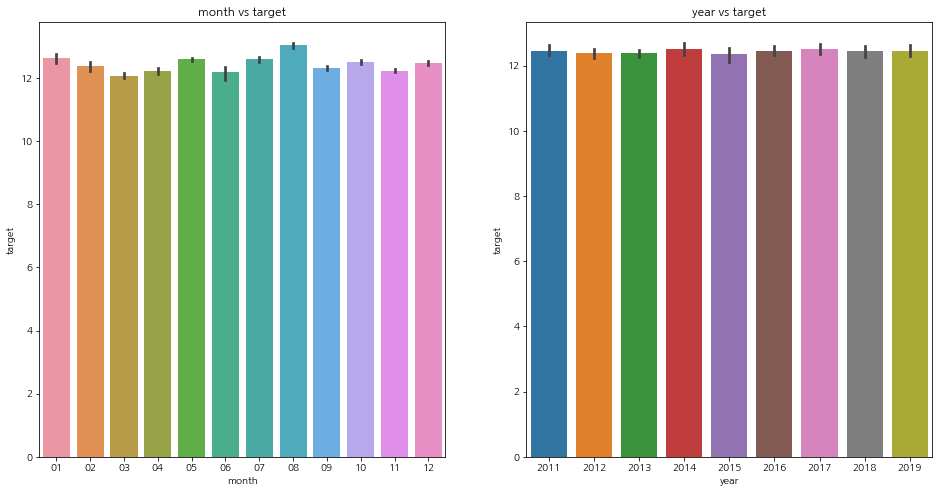

In [238]:
# 월별과 년별로 어떠한 차이가 있는지 확인 해 보자.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = data, x = 'month', y = 'target', ax = ax[0])
sns.barplot(data = data, x = 'year', y = 'target', ax = ax[1])
ax[0].set_title('month vs target')
ax[1].set_title('year vs target')

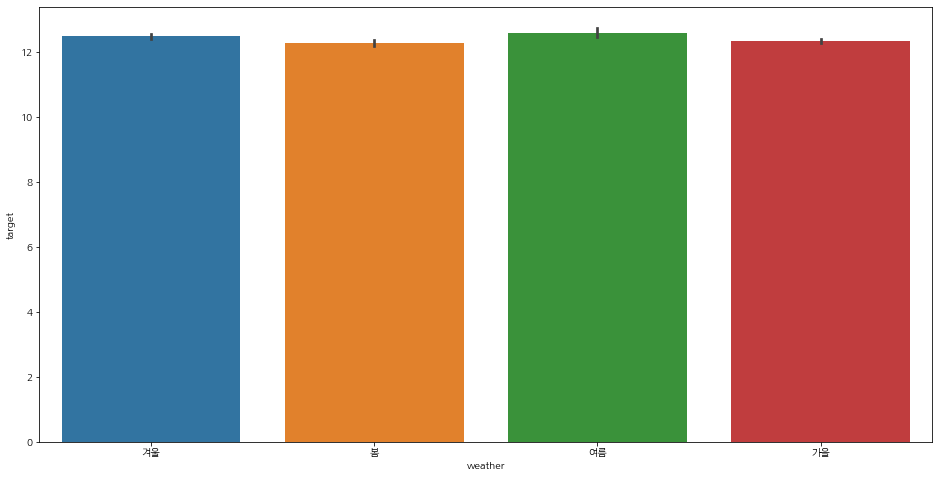

In [239]:
# 계절별로 차이가 있는지 확인해 보자.
plt.figure(figsize = (16,8))
sns.barplot(data = data, x = 'weather', y = 'target')

# 경복궁과는 다르게 여름과 겨울에 많이 분포되어 있는 것으로 확인했다.

# modeling

In [240]:
# train과 test로 나눠주기
data['일시'] = data['일시'].astype('int')
train = data[data['일시'] <= 201712]
test = data[data['일시'] > 201712]

# 더미화와 쓰지 않을 것을 제거해준다.
drop = ['일시','year']
dummies = ['month','weather']
data_stats = pd.get_dummies(data = data, columns = dummies)
data_stats = data_stats.drop(drop, axis = 1)

train = pd.get_dummies(data = data, columns = dummies)
test = pd.get_dummies(data = data, columns = dummies)

train = train.drop(drop, axis=1)
test = test.drop(drop, axis = 1)

In [241]:
data_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   평균기온             108 non-null    float64
 1   최고기온             108 non-null    float64
 2   최저상대습도           108 non-null    int64  
 3   평균상대습도           108 non-null    int64  
 4   총강수량             108 non-null    float64
 5   평균풍속             108 non-null    float64
 6   일조시간             108 non-null    float64
 7   target           108 non-null    float64
 8   최저해면기압(hPa)      108 non-null    float64
 9   최대순간풍속 풍향(16방위)  108 non-null    int64  
 10  여름철 체감온도         108 non-null    float64
 11  겨울철 체감온도         108 non-null    float64
 12  불쾌지수             108 non-null    float64
 13  month_01         108 non-null    uint8  
 14  month_02         108 non-null    uint8  
 15  month_03         108 non-null    uint8  
 16  month_04         108 non-null    uint8  
 17  month_05        

# statsmodels

In [242]:
# statsmodels 보기
import statsmodels.api as sm
X = sm.add_constant(data_stats.drop('target', axis = 1))
y = data_stats['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     11.71
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.36e-17
Time:                        11:36:38   Log-Likelihood:                 55.985
No. Observations:                 108   AIC:                            -63.97
Df Residuals:                      84   BIC:                            0.4020
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              17.6239      6.245     

In [243]:
!pip install catboost

In [247]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test = train.drop('target', axis = 1), test.drop('target', axis = 1)
y_train, y_test = train['target'], test['target']

models = {'lightgbm':LGBMRegressor(), 'xgboost':XGBRegressor(),'catboost': CatBoostRegressor(),'lr': LinearRegression(),'ridge': Ridge(),'lasso': Lasso()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  y_pred = np.exp(y_pred) - 1
  model_test = y_test.copy()
  model_test = np.exp(model_test)-1
  RMSE = mean_squared_error(model_test, y_pred) ** 0.5

  model_rmse[i] = RMSE
  print(f'{i}',model.score(X_test, y_test))

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

lightgbm 0.7760799622574326
[11:40:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost 0.9633300180003704
Learning rate set to 0.026263
0:	learn: 0.2920556	total: 1.48ms	remaining: 1.48s
1:	learn: 0.2895544	total: 2.98ms	remaining: 1.49s
2:	learn: 0.2865392	total: 4.42ms	remaining: 1.47s
3:	learn: 0.2839549	total: 5.97ms	remaining: 1.49s
4:	learn: 0.2818767	total: 7.4ms	remaining: 1.47s
5:	learn: 0.2793584	total: 8.78ms	remaining: 1.45s
6:	learn: 0.2770467	total: 10.2ms	remaining: 1.45s
7:	learn: 0.2740444	total: 11.6ms	remaining: 1.44s
8:	learn: 0.2713231	total: 13ms	remaining: 1.44s
9:	learn: 0.2690705	total: 14.5ms	remaining: 1.43s
10:	learn: 0.2667334	total: 15.9ms	remaining: 1.43s
11:	learn: 0.2645915	total: 17.3ms	remaining: 1.42s
12:	learn: 0.2616894	total: 18.7ms	remaining: 1.42s
13:	learn: 0.2589960	total: 20.1ms	remaining: 1.42s
14:	learn: 0.2569950	total: 21.6ms	remaining: 1.42s
15:	learn: 0.2548000	